In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
flights = pd.read_csv('flights.csv')

### Количество полётов из Нью-Йорка в Майами

In [39]:
len(flights[(flights.dest=='MIA') & ((flights.origin == 'EWR') | (flights.origin == 'LGA') | (flights.origin == 'JFK'))])     

11728

### Количество рейсов из Нью-Йорка в Майами (unique carrier)

In [40]:
len(flights[(flights.dest=='MIA') & ((flights.origin == 'EWR') | (flights.origin == 'LGA') | (flights.origin == 'JFK'))].carrier.unique())                                      

3

### Количество самолётов, летающих между Нью-Йорком и Майами (unique tailnum)

In [41]:
len(flights[(flights.dest=='MIA') & ((flights.origin == 'EWR') | (flights.origin == 'LGA') | (flights.origin == 'JFK'))].tailnum.unique()) 

1175

### Среднее время задержки самолётов по прилёте в Майами


In [42]:
miami = flights[(flights.dest=='MIA') & ((flights.origin == 'EWR') | (flights.origin == 'LGA') | (flights.origin == 'JFK'))]     
print (np.mean(miami.arr_delay))

0.29905977745191065


### Соотношение полётов в Майами из всех аэропортов Н-Й


In [43]:
miami = flights[(flights.dest == 'MIA')]  

grouped_MIAMI = miami.groupby([miami.origin]).size()
print (pd.DataFrame({'Percentage':grouped_MIAMI / len(miami)}))

        Percentage
origin            
EWR       0.224505
JFK       0.282572
LGA       0.492923


### Самые популярные направления из Н-Й

In [44]:
dests = flights.groupby(["dest"]).size().reset_index()

In [45]:
dests = dests.rename(columns = {0:"pers"})
dests.pers = dests.pers/(dests.pers.sum()) * 100

Рассмотрим 10 наиболее популярных направлений

In [46]:
dests_pop = dests.sort_values('pers')[-10:]

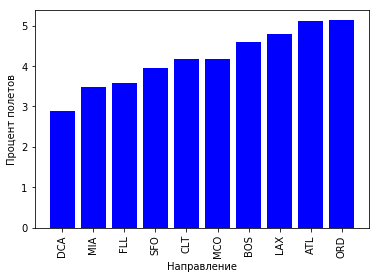

In [47]:
ind = np.arange(len(dests_pop.dest))
plt.bar(ind, dests_pop.pers, color="blue")
plt.ylabel('Процент полетов')
plt.xlabel('Направление')
plt.xticks(ind, dests_pop.dest,
           rotation = 90)
plt.show()

In [48]:
dests_pop.pers.sum().round()

42.0

In [49]:
dests.shape[0]

105

Из расмотренных данных можно заметить, что 10 наиболее популярных направлений из 105 составляют 41% всего трафика!

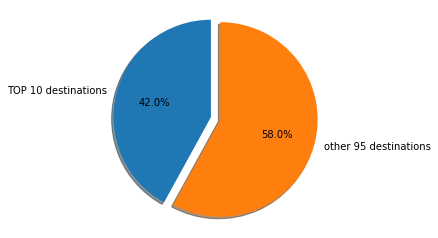

In [50]:
labels = 'TOP 10 destinations', 'other 95 destinations'
sizes = [dests_pop.pers.sum().round(), 100 - dests_pop.pers.sum().round()]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### Зависимость задержек отправления от дня/месяца

In [51]:
delayed_flights = flights[flights.dep_delay > 0]

In [52]:
grouped_flights = flights.groupby([flights.month,flights.day]).mean()

In [53]:
print(f"Max задержка рейса {np.round(max(grouped_flights.arr_delay), 0)} мин, max ранее отправление {abs(np.round(min(grouped_flights.arr_delay)))} мин")

Max задержка рейса 86.0 мин, max ранее отправление 20.0 мин


### Время задержки от месяца:

In [54]:
grouped_flights_by_month = flights.groupby([flights.month]).mean()

(1, 12)

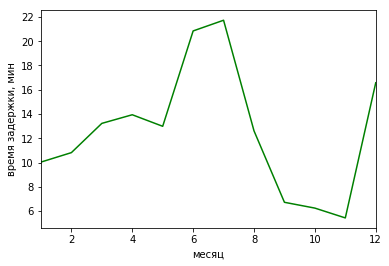

In [55]:
month_delays = grouped_flights_by_month.dep_delay
plt.plot(month_delays, "-g")
plt.ylabel('время задержки, мин')
plt.xlabel('месяц')
plt.xlim(1, 12)

### Количество задержек в каждом месяце:

In [56]:
delayed_by_month = grouped_flights_by_month[grouped_flights_by_month.dep_delay > 0]

(1, 12)

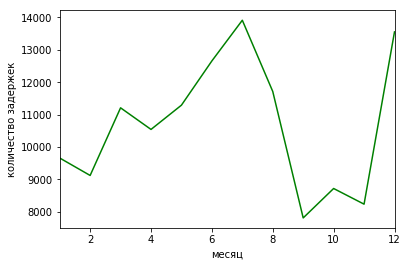

In [57]:
dels_per_month = delayed_flights.groupby([delayed_flights.month]).dep_delay.size()
plt.plot(dels_per_month, "-g")
plt.ylabel('количество задержек')
plt.xlabel('месяц')
plt.xlim(1, 12)

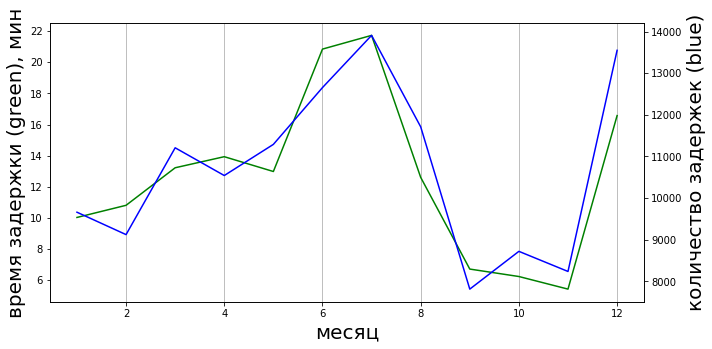

In [58]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(month_delays, '-g')
ax.grid(axis = 'x')
ax.set_ylabel('время задержки (green), мин',fontsize=20)
ax.set_xlabel('месяц',fontsize=20)
ax2 = ax.twinx()
ax2.set_ylabel('количество задержек (blue)',fontsize=20)
ax2.plot(dels_per_month,'-b')
ax2.grid(axis = 'x')

fig.tight_layout()

Легко заметить, что количество задержек явно сильно зависит от нагрузки аэропорта, так как пики приходятся на летний сезон отпусков и рождественские  праздники.

### Количество задержек в течение дня:

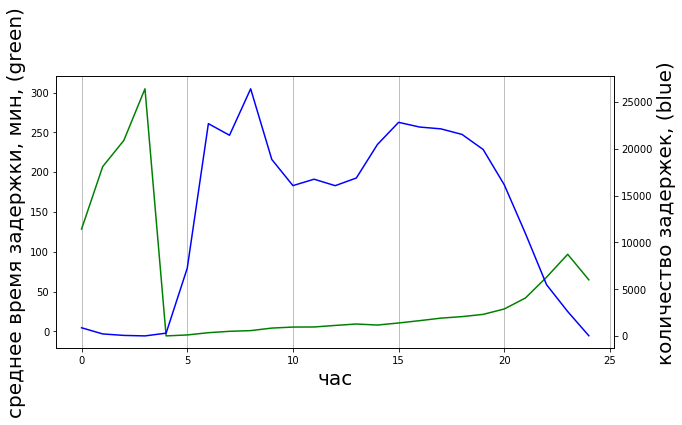

In [59]:
grouped_flights_by_hours = flights.groupby([flights.hour]).mean()
hours_delays = grouped_flights_by_hours.dep_delay
hours_dd = flights.groupby([flights.hour]).dep_delay.size()


pfig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(hours_delays, '-g')
ax.grid(axis = 'x')
ax.set_ylabel('среднее время задержки, мин, (green)',fontsize=20)
ax.set_xlabel('час',fontsize=20)
ax2 = ax.twinx()
ax2.set_ylabel('количество задержек, (blue)',fontsize=20)
ax2.plot(hours_dd,'-b')
ax2.grid(axis = 'x')

fig.tight_layout()

Интересно заметить, что в отличие от зависимости средней задержки и количества задержек по месяцам, такая же зависимость, но по времени суток оказывается совершенно другой.
В ночное время суток количество задержек значительно меньше, так как совершается меньшее количество полётов.
Однако среднее время задержки оказывается больше, так как, вероятно, пассажиры опаздывают на рейсы, также возможно, что работоспособность сотрудников хуже в ночное время, что также влияет на время задержки. 

### Зависимось задержек от погодных условий

In [60]:
weather = pd.read_csv('weather.csv')

In [68]:
grouped_df = delayed_flights.groupby([delayed_flights.origin, delayed_flights.month, delayed_flights.day, delayed_flights.hour])
info_on_grouped_df = grouped_df.dep_delay.agg([np.size, np.mean]).reset_index()

In [69]:
weather_and_flights = pd.merge(info_on_grouped_df, weather, on=['origin','month','day', 'hour'])

In [72]:
visibility_df = weather_and_flights.groupby([weather_and_flights.visib]).mean().reset_index()

In [73]:
visib_df = visibility_df.rename(columns={'size': 'delays', 'mean':'dep_delay_mean'})

Text(0,0.5,'средняя задержка, мин')

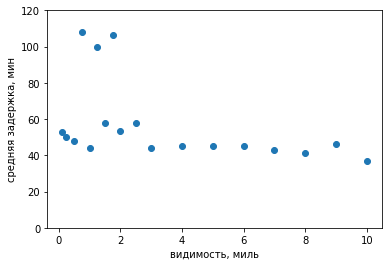

In [74]:
plt.plot(visib_df.visib,visib_df.dep_delay_mean, 'o')
plt.ylim(0, 120)
plt.xlabel('видимость, миль')
plt.ylabel('средняя задержка, мин')

Text(0,0.5,'среднее число задержек')

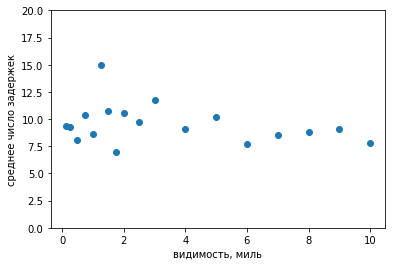

In [75]:
plt.plot(visib_df.visib, visib_df.delays, 'o')
plt.ylim(0, 20)
plt.xlabel('видимость, миль')
plt.ylabel('среднее число задержек')

Из полученных графиков видно, что условия видимости влияют на число и время задержек, однако незначительно. Стоит заметить, что при видимости хуже, чем 3 мили среднее время задержки значительно вырастает, а среднее число задержек в среднем также увеличивается.


In [76]:
wind_df = weather_and_flights.groupby([weather_and_flights.wind_speed]).mean().reset_index()
wind_df = wind_df.rename(columns={'size': 'delays', 'mean':'dep_delay_mean'})

Text(0,0.5,'средняя задержка, мин')

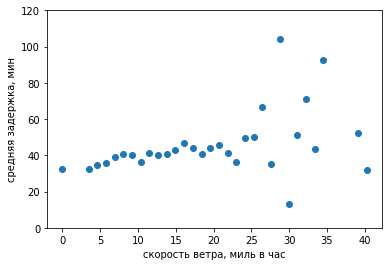

In [77]:
plt.plot(wind_df.wind_speed[:-1],wind_df.dep_delay_mean[:-1], 'o')
plt.ylim(0, 120)
plt.xlabel('скорость ветра, миль в час')
plt.ylabel('средняя задержка, мин')

Text(0,0.5,'среднее число задержек')

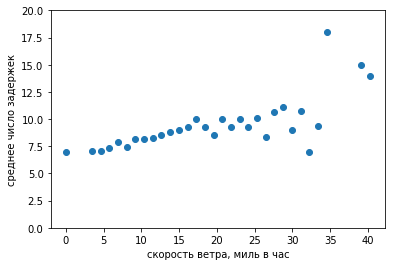

In [78]:
plt.plot(wind_df.wind_speed[:-1],wind_df.delays[:-1], 'o')
plt.ylim(0, 20)
plt.xlabel('скорость ветра, миль в час')
plt.ylabel('среднее число задержек')

Скорость ветра, как и видимость оказывает слабое влияние на среднее время задержки и  до определенного значения, а затем значительно растет в среднем.
Интересно заметить, что наблюдается линейная зависимоть, однако с определенного значения дисперсия исследуемых парметров значительно возрастает, что говорит о том, что при высоких значениях скорости ветра оценка задержки должна основываться на других доступных параметрах. 